In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
image=cv2.imread("/content/063fdfaf5b8e30321c64f5d67a40e540.jpg",0)

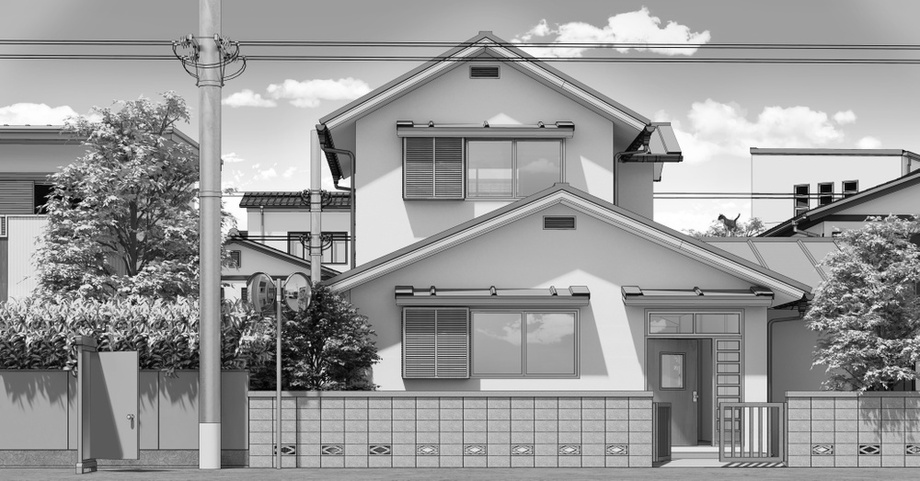

In [ ]:
cv2_imshow(image)

PREWITT MASK

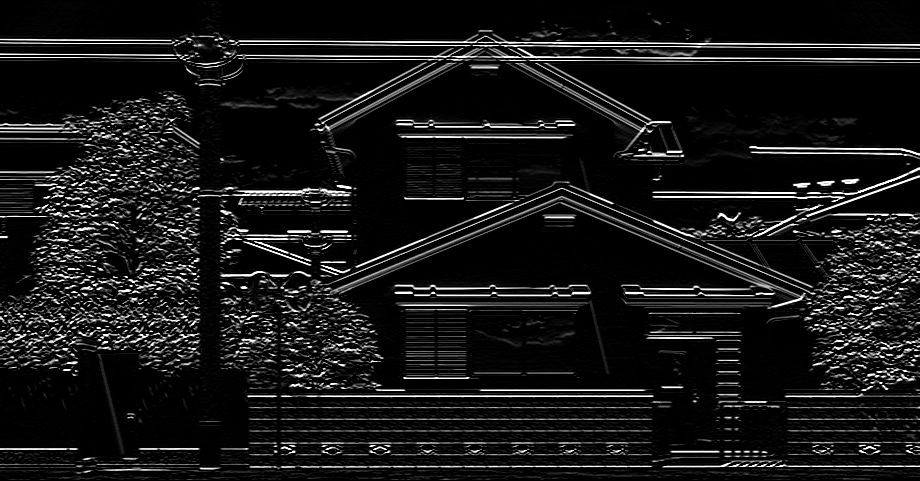

In [ ]:
Fx= np.float32([[1,1,1],
             [0,0,0],
             [-1,-1,-1]])

horizontal = cv2.filter2D(image, -1, Fx)

cv2_imshow(horizontal)

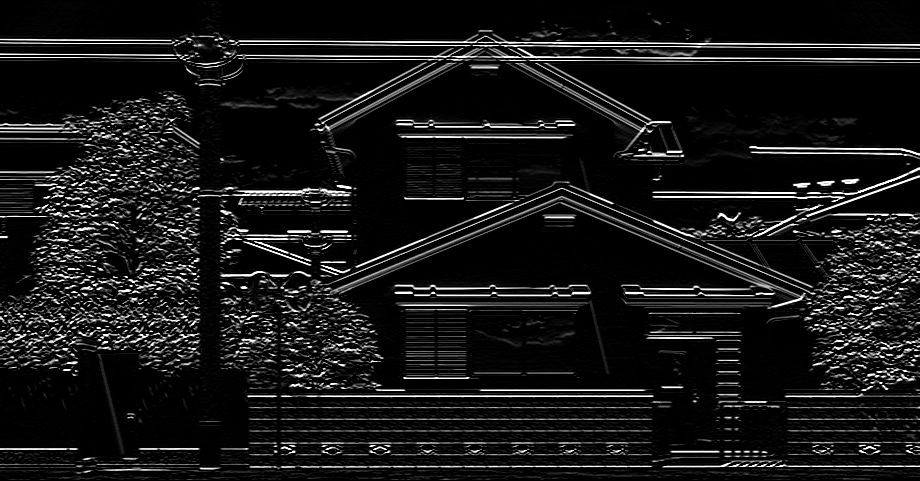

In [ ]:
Fy= np.float32([[-1,0,1],
             [-1,0,1],
             [-1,0,1]])

vertical = cv2.filter2D(image, -1, Fx)

cv2_imshow(vertical)

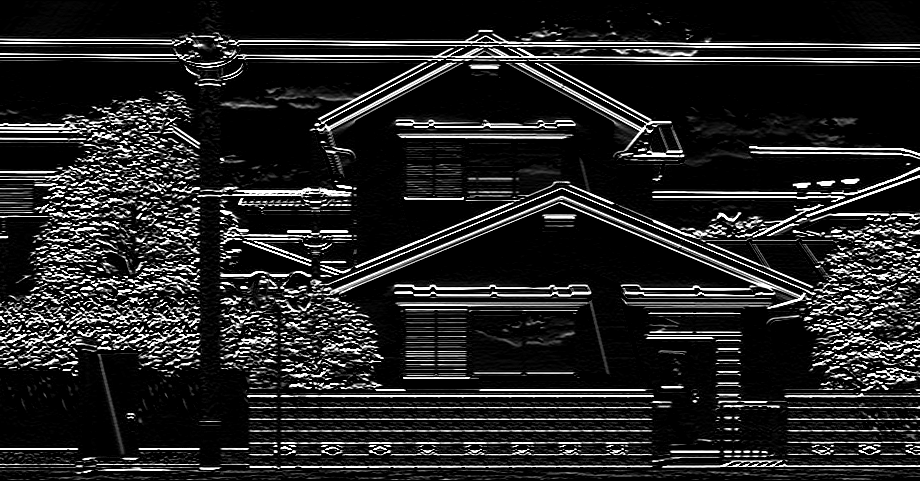

In [ ]:
prewitt=cv2.add(horizontal, vertical)

cv2_imshow(prewitt)

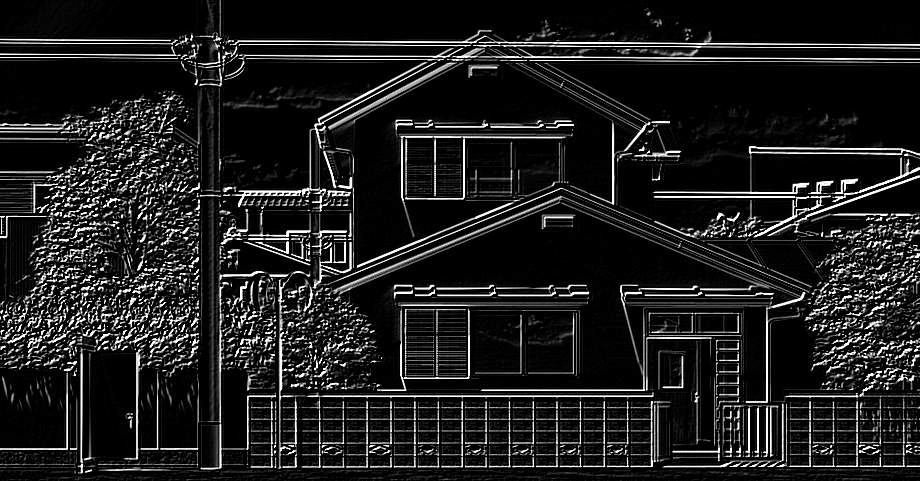

In [ ]:
F= np.float32([[2,1,0],
             [1,0,-1],
             [0,-1,-2]])

F_together = cv2.filter2D(image, -1, F)

cv2_imshow(F_together)

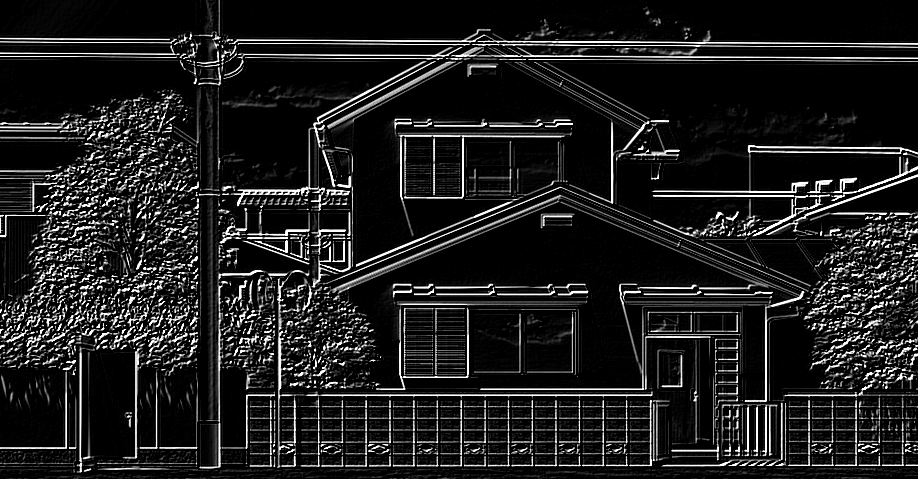

In [ ]:
# def convolve(img, mask):
#   output = np.zeros((img.shape[0] - 2, img.shape[1] - 2), np.uint8)
#   for i in range(1, img.shape[0] - 1):
#       for j in range(1, img.shape[1] - 1):
#         sum=0
#         for l in range(3):
#           for m in range(3):
#             sum += mask[l][m] * img[i+(l-1)][j+(m-1)]
#             sum = max(0,sum)
#             sum - min(255, sum)
#             output[1 - 1][j - 1]=sum
#             return output

def convolve(img, mask):
    output = np.zeros((img.shape[0] - 2, img.shape[1] - 2), np.uint8)
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            sum = 0
            for l in range(3):
                for m in range(3):
                    sum += mask[l][m] * img[i + (l - 1)][j + (m - 1)]
            sum = max(0,sum)
            sum= min(255, sum)
            output[i - 1][j - 1] = sum
    return output

mask= np.float32([[2,1,0],
             [1,0,-1],
             [0,-1,-2]])

image2=convolve(image,mask)

cv2_imshow(image2)

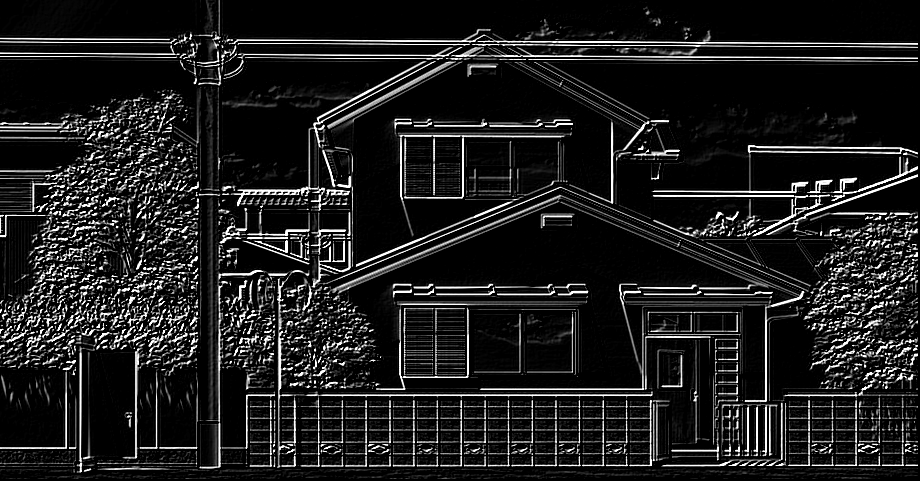

In [ ]:
noisy_image=image
kernel_size=3

filter_kernel=np.float32([[2,1,0],
             [1,0,-1],
             [0,-1,-2]])


filtered_image = np.zeros_like(noisy_image)
for i in range(noisy_image.shape[0] - kernel_size + 1):
    for j in range(noisy_image.shape[1] - kernel_size + 1):
        patch = noisy_image[i:i+kernel_size, j:j+kernel_size]
        filtered_image[i,j] = np.clip(np.sum(patch * filter_kernel),0,255)

image3=filtered_image
cv2_imshow(image3)

SOBEL MASK

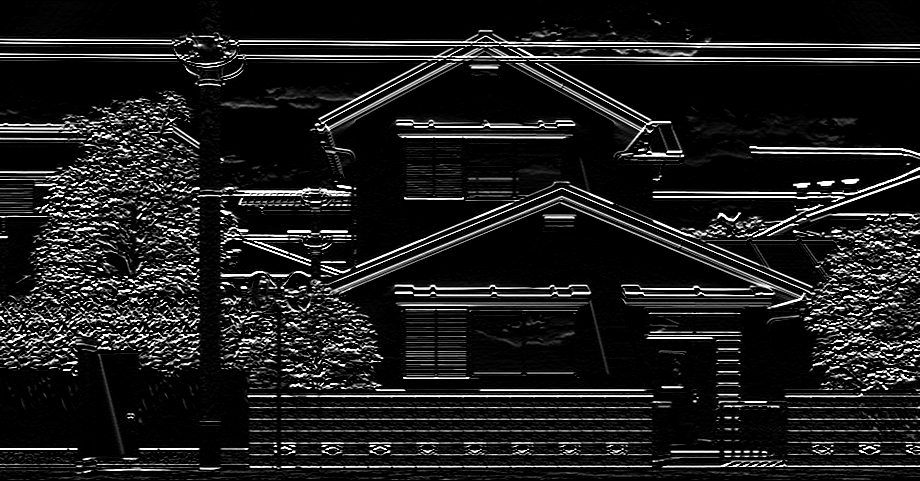

In [ ]:
SOBEL_Fx= np.float32([[1,2,1],
             [0,0,0],
             [-1,-2,-1]])

horizontal_sobel = cv2.filter2D(image, -1, SOBEL_Fx)

cv2_imshow(horizontal_sobel)

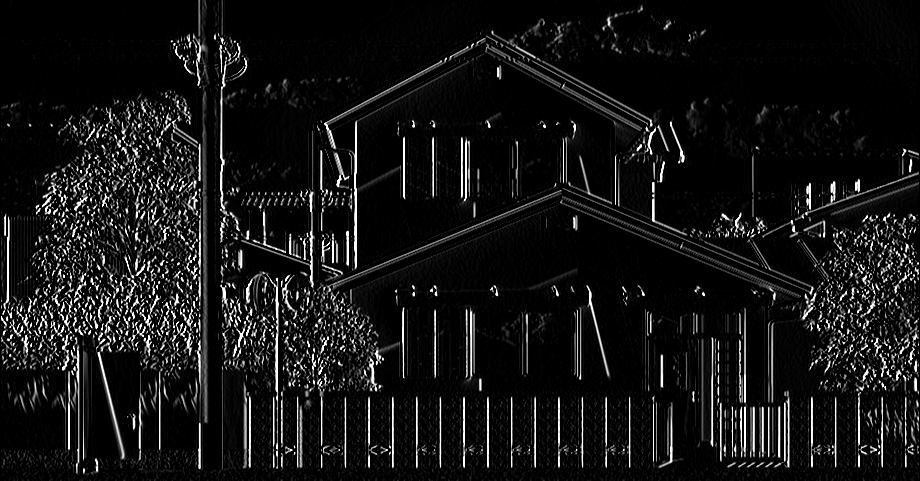

In [ ]:
SOBEL_Fy= np.float32([[-1,0,1],
             [-2,0,2],
             [-1,0,1]])

vertical_sobel = cv2.filter2D(image, -1, SOBEL_Fy)

cv2_imshow(vertical_sobel)

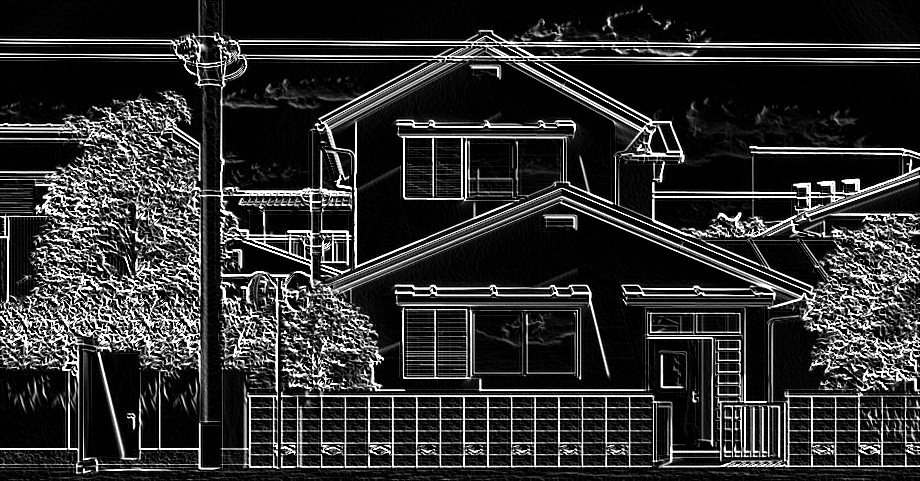

In [ ]:
sobel=cv2.add(horizontal_sobel, vertical_sobel)

cv2_imshow(sobel)

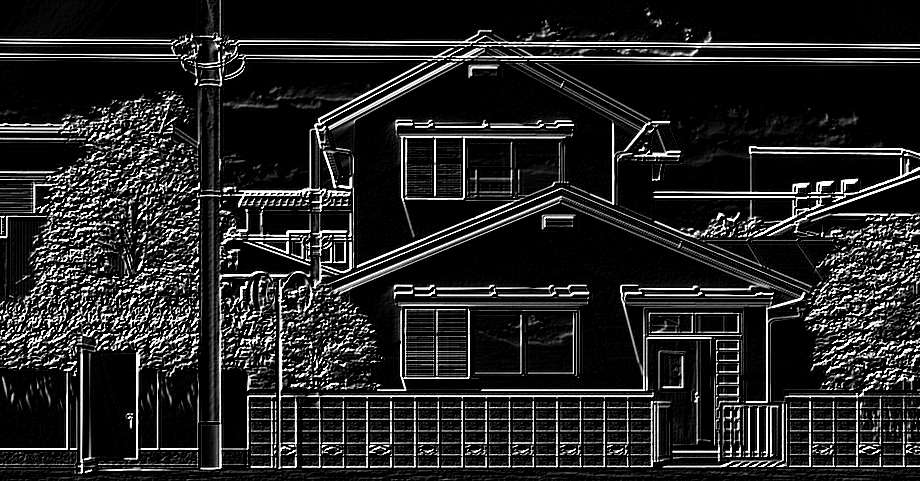

In [ ]:
F_sobel= np.float32([[2,2,0],
             [2,0,-2],
             [0,-2,-2]])

F_combined = cv2.filter2D(image, -1, F_sobel)

cv2_imshow(F_combined)

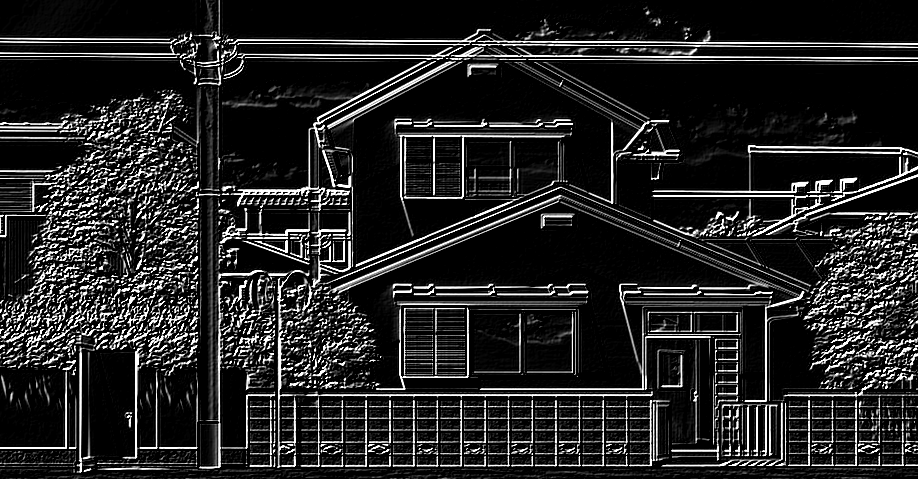

In [ ]:
def convolve(img, mask):
    output = np.zeros((img.shape[0] - 2, img.shape[1] - 2), np.uint8)
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            sum = 0
            for l in range(3):
                for m in range(3):
                    sum += mask[l][m] * img[i + (l - 1)][j + (m - 1)]
            sum = max(0,sum)
            sum= min(255, sum)
            output[i - 1][j - 1] = sum
    return output

mask= np.float32([[2,2,0],
             [2,0,-2],
             [0,-2,-2]])

image2=convolve(image,mask)

cv2_imshow(image2)